<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Liver_Cirrhosis_Stage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Loading

# Liver Cirrhosis Stage Detection

## Objective
The goal of this project is to build a machine learning model that can **predict the histologic stage of liver damage (Stage 1, 2, or 3)** in patients diagnosed with **Primary Biliary Cirrhosis (PBC)**.  
The model uses **clinical, demographic, and laboratory data** to estimate the severity of liver disease.

---

## Dataset Description
The dataset comes from a **Mayo Clinic study (1974–1984)** on primary biliary cirrhosis patients.  
Each row represents a patient with multiple clinical and lab test results.

### Columns:
- **N_Days**: Number of days between registration and death, liver transplant, or study end (1986).
- **Status**: Patient status at last follow-up:  
  - `C`: Censored (alive at study end)  
  - `CL`: Censored due to liver transplant  
  - `D`: Death
- **Drug**: Treatment group – `D-penicillamine` or `Placebo`.
- **Age**: Age of the patient (in days).
- **Sex**: `M` (Male) or `F` (Female).
- **Ascites**: Presence of fluid accumulation in the abdomen (`Y` = Yes, `N` = No).
- **Hepatomegaly**: Presence of liver enlargement (`Y` = Yes, `N` = No).
- **Spiders**: Presence of spider angiomas (blood vessel abnormalities) (`Y` = Yes, `N` = No).
- **Edema**: Level of swelling:  
  - `N`: No edema  
  - `S`: Edema controlled with diuretics or resolved  
  - `Y`: Edema despite therapy (severe)
- **Bilirubin**: Serum bilirubin level (mg/dL).
- **Cholesterol**: Serum cholesterol level (mg/dL).
- **Albumin**: Serum albumin (g/dL).
- **Copper**: Urine copper (µg/day).
- **Alk_Phos**: Alkaline phosphatase enzyme (U/L).
- **SGOT**: Serum glutamic-oxaloacetic transaminase (U/mL) – a liver enzyme.
- **Triglycerides**: Serum triglycerides (mg/dL).
- **Platelets**: Platelet count (per 1000 cells/mL).
- **Prothrombin**: Prothrombin time (seconds) – measures blood clotting function.
- **Stage**: **Histologic stage of liver disease** (target variable):  
  - `1`: Mild fibrosis  
  - `2`: Moderate fibrosis  
  - `3`: Severe fibrosis (advanced cirrhosis)

---

## Goal
Using this dataset, we will:
1. **Preprocess the data** (handle categorical variables and missing values).
2. **Explore relationships** between clinical features and stage.
3. **Build and evaluate machine learning models** (e.g., XGBoost, Random Forest) to classify patients into Stage 1, 2, or 3.
4. **Identify the most important features** (e.g., Bilirubin, Albumin, Prothrombin, Ascites) influencing disease progression.

The final model will help doctors and researchers **predict liver cirrhosis severity** and understand which factors most strongly indicate progression.


In [329]:
# Importing libraries for loading and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
# Data loading
df=pd.read_csv('/content/liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [331]:
# Data dimension
df.shape

(25000, 19)

In [332]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [333]:
# Sum of null values
df.isnull().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


**Data is having no missing or null values**

In [334]:
# Check for unique values and their count
df['Stage'].value_counts()

,count
Stage,
2,8441
3,8294
1,8265


**Target column having 3 types of categories Stage 1,2 and 3**

In [335]:
# Descriptive Statistics of this data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,25000.0,1887.117040,1091.690918,41.00,1080.00,1680.000000,2576.000000,4795.00
Age,25000.0,18495.877080,3737.596616,9598.00,15694.00,18499.000000,20955.000000,28650.00
Bilirubin,25000.0,3.402644,4.707491,0.30,0.80,1.300000,3.400000,28.00
Cholesterol,25000.0,372.331471,193.668452,120.00,275.00,369.510563,369.510563,1775.00
Albumin,25000.0,3.486578,0.380488,1.96,3.29,3.510000,3.750000,4.64
Copper,25000.0,100.184663,73.184840,4.00,52.00,97.648387,107.000000,588.00
Alk_Phos,25000.0,1995.675597,1798.885660,289.00,1032.00,1828.000000,1982.655769,13862.40
SGOT,25000.0,123.166345,47.747616,26.35,92.00,122.556346,134.850000,457.25
Tryglicerides,25000.0,123.822548,52.786350,33.00,92.00,124.702128,127.000000,598.00
Platelets,25000.0,256.007337,98.679006,62.00,189.00,251.000000,311.000000,721.00


In [336]:
# Check for unique values
df['Drug'].unique()

array(['Placebo', 'D-penicillamine'], dtype=object)

###Data Preprocessing

In [337]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [338]:
df['Status'].value_counts()

,count
Status,
C,13516
D,9456
CL,2028


In [339]:
# Mapping the values of C,CL and D to 1,2 and 0 respectively
df['Status']=df['Status'].map({'D':0,'C':1,'CL':2})

In [340]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,1,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,1,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,1,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,0,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,0,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [341]:
df['Drug'].unique()

array(['Placebo', 'D-penicillamine'], dtype=object)

In [342]:
#Changing the category column into numerical as 'D-penicillamine':0,'Placebo':1
df['Drug']=df['Drug'].map({'D-penicillamine':0,'Placebo':1})

In [343]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,1,1,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,1,1,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,1,1,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,0,1,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,0,1,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [344]:
# Female ->0 and Male -> 1
df['Sex']=df['Sex'].map({'F':0,'M':1})

In [345]:
# Converting Ascites column types No->0 and Yes->1
df['Ascites']=df['Ascites'].map({'N':0,'Y':1})

In [346]:
# Converting Hepatamology column types No->0 and Yes->1
df['Hepatomegaly']=df['Hepatomegaly'].map({'N':0,'Y':1})

In [347]:
# Converting Spiders column types No->0 and Yes->1
df['Spiders']=df['Spiders'].map({'N':0,'Y':1})

In [348]:
df['Edema'].value_counts()

,count
Edema,
N,20220
S,3698
Y,1082


In [349]:
# Converting Edema column types of a N (no edema and no diuretic therapy for edema), S (edema
# present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic
# therapy
df['Edema']=df['Edema'].map({'N':0,'S':1,'Y':2})

In [350]:
df.info()
# Here all columns are converted into numerical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  int64  
 2   Drug           25000 non-null  int64  
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  int64  
 5   Ascites        25000 non-null  int64  
 6   Hepatomegaly   25000 non-null  int64  
 7   Spiders        25000 non-null  int64  
 8   Edema          25000 non-null  int64  
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [351]:
# Change the Age(days) to Age(years)
df['Age(Years)']=df['Age'].apply(lambda x:int(x/365))

In [352]:
# Dropping The Age(days) column
df=df.drop('Age',axis=1)

In [353]:
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age(Years)
0,2221,1,1,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50
1,1230,1,1,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54
2,4184,1,1,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32
3,2090,0,1,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45
4,2105,0,1,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59


In [354]:
# Correlation b/w target to other columns
df.corr()['Stage']

,Stage
N_Days,-0.309484
Status,-0.217793
Drug,0.030862
Sex,0.061687
Ascites,0.111012
Hepatomegaly,0.353210
Spiders,0.168049
Edema,0.251095
Bilirubin,0.168006
Cholesterol,0.025415


###Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matric')

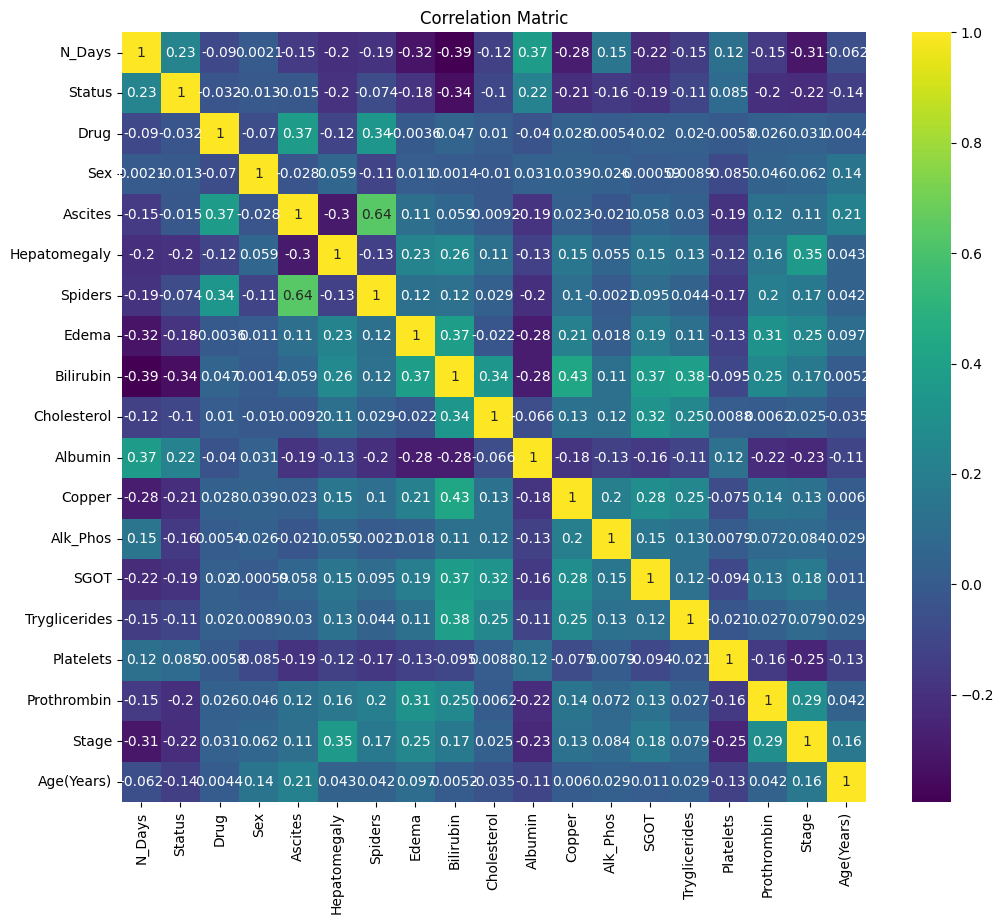

In [355]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation Matric')

In [356]:
# Max age in years
df['Age(Years)'].max()

78

Text(0.5, 1.0, 'Stage of Disease Based on Age')

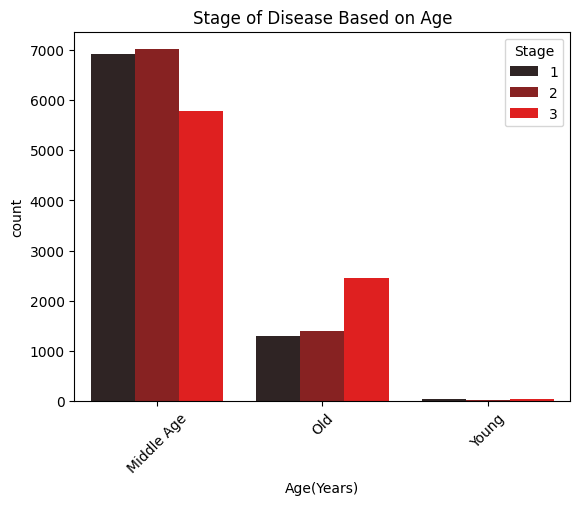

In [357]:
def age(x):
  if x<30:
    return 'Young'
  elif x>=30 and x<60:
    return 'Middle Age'
  else:
    return 'Old'
df1=df['Age(Years)'].apply(lambda x:age(x))
sns.countplot(x=df1,hue=df['Stage'],color='red',palette='dark:red')
plt.xticks(rotation=45)
plt.title('Stage of Disease Based on Age')

**It seems that the age between 30 and above people have higher chance of disease cause even death also**

Text(0.5, 1.0, 'Stage of Disease based on Gender')

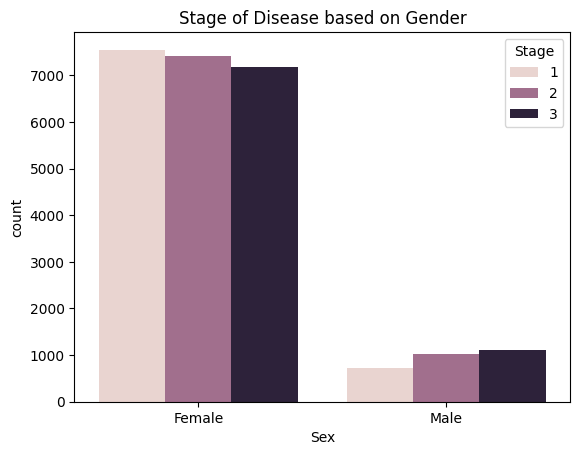

In [358]:
def gender(x):
  if x==0:
    return 'Female'
  else:
    return 'Male'
sex=df['Sex'].apply(lambda x:gender(x))
sns.countplot(x=sex,hue=df['Stage'])
plt.title('Stage of Disease based on Gender')

**Most of them are females who are effected by cirrhosis disease**

Text(0.5, 1.0, 'Drugs used at stages')

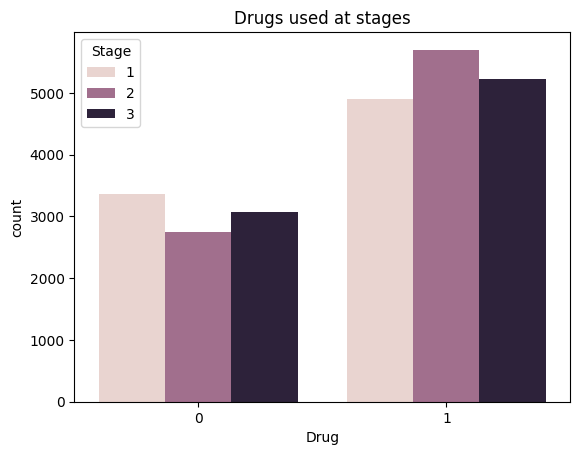

In [359]:
sns.countplot(data=df,x='Drug',hue='Stage')
plt.title('Drugs used at stages')

**Placebo was used more than that of D-Pencillamine and it has no impact on disease stage detection, I drop this column**

In [360]:
# Dropping the Drug column
df.drop('Drug',axis=1,inplace=True)

In [361]:
df.head()

,N_Days,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age(Years)
0,2221,1,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50
1,1230,1,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54
2,4184,1,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32
3,2090,0,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45
4,2105,0,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59


Text(0.5, 1.0, 'Ascites vs Stage')

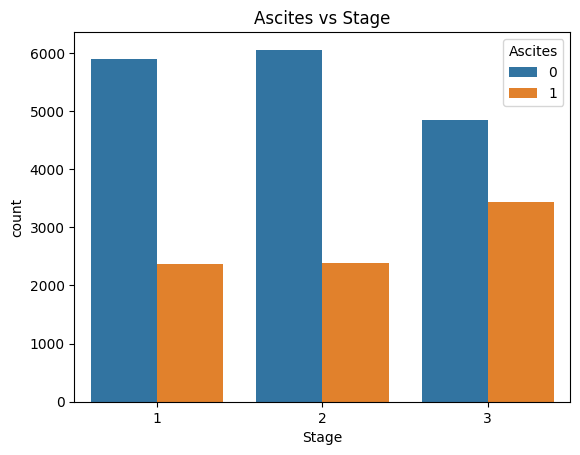

In [362]:
sns.countplot(data=df, x='Stage',hue='Ascites')
plt.title('Ascites vs Stage')

**Ascites is present more in stage 3 indicates severe attention to person with stage 3**

Text(0.5, 1.0, 'Spider Angiomas vs Stage')

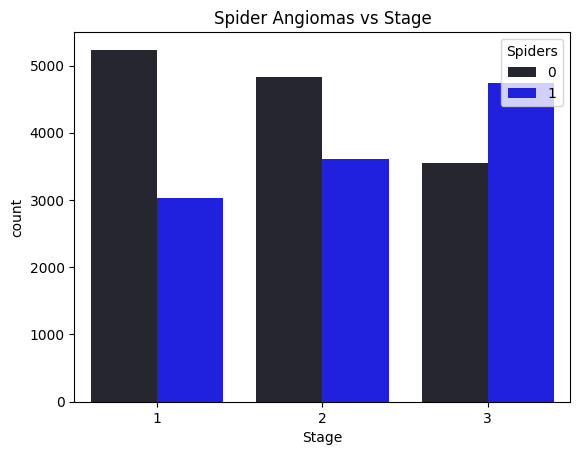

In [363]:
sns.countplot(data=df, x='Stage',hue='Spiders',palette='dark:blue')
plt.title('Spider Angiomas vs Stage')

**At Stage 3 Spider(spider angiomas) is present repatedly**

Text(0.5, 1.0, 'Edema vs Stage')

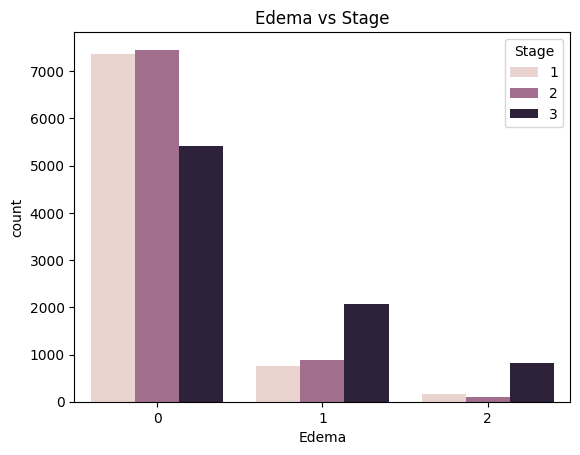

In [364]:
sns.countplot(data=df,x='Edema',hue='Stage')
plt.title('Edema vs Stage')

**0 (no edema) – common in early stages (1–2).
1 (controlled/resolved by diuretics) – often Stage 2–3.
2 (edema despite therapy) – strongly suggests Stage 3 (severe portal hypertension).**

Text(0.5, 1.0, 'Bilirubin vs Stage')

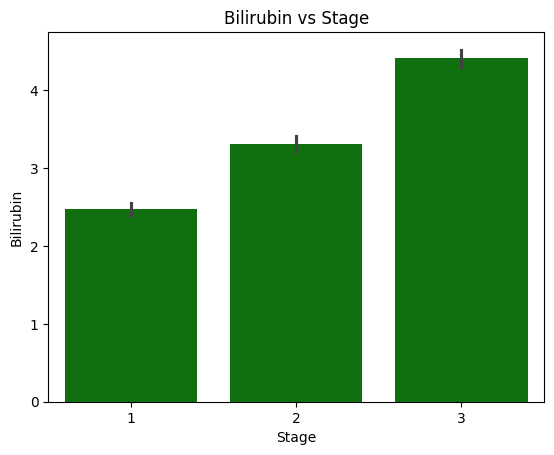

In [365]:
sns.barplot(data=df,x='Stage',y='Bilirubin',color='green')
plt.title('Bilirubin vs Stage')

**Bilrubin content is more in Stage 3**

###Model Develpoment

In [366]:
# Importing libraries for model development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [367]:
X = df.drop('Stage', axis=1)
y = df['Stage'] - 1 # Adjust the target variable to be 0 -indexed

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Using XGBoost Classifier

In [369]:
# Importing model
from xgboost import XGBClassifier

In [370]:
# Creating Object for model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

In [371]:
# Train model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [372]:
# Predict
predictions = model.predict(X_test)

In [373]:
# Calculate metrics for my model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1657
           1       0.95      0.96      0.96      1697
           2       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



In [374]:
# Metrics for model
print(confusion_matrix(y_test,predictions))

[[1582   56   19]
 [  33 1637   27]
 [  14   32 1600]]


<Axes: >

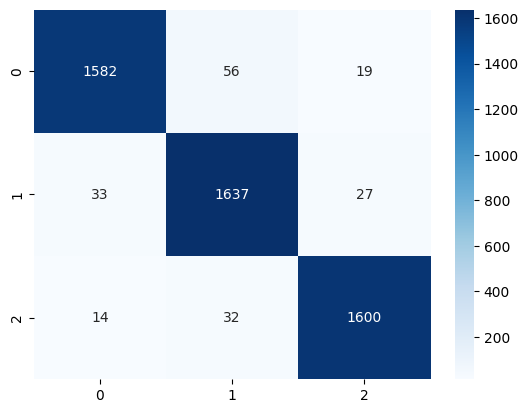

In [375]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='Blues',fmt='d')

####Using Random Forest Classifier

In [376]:
# Importing model
from sklearn.ensemble import RandomForestClassifier

In [377]:
# Creating object for my model
Rfc=RandomForestClassifier()

In [378]:
# Train the model
Rfc.fit(X_train,y_train)

RandomForestClassifier()

In [379]:
# Predict the model
pred1=Rfc.predict(X_test)

In [380]:
# Metrics for model
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1657
           1       0.94      0.96      0.95      1697
           2       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



In [381]:
# Metrics for model
print(confusion_matrix(y_test,pred1))

[[1554   78   25]
 [  39 1626   32]
 [  14   34 1598]]


***Thank You***